In [43]:
import seaborn as sns
import nltk
import collections as co
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv('finalData.csv', encoding='cp437')
df.head()

,Unnamed: 0,title,country,date_added,release_year,rating,duration,listed_in,description,user_rating
0,4,Limitless,United States,1-Jul-16,2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy",A failed musician unleashes his brain's full p...,84.0
1,5,Gilmore Girls: A Year in the Life,United States,25-Nov-16,2016,TV-14,1 Season,"TV Comedies, TV Dramas, Teen TV Shows",Set nearly a decade after the finale of the or...,77.0
2,8,Charmed,United States,"October 1, 2017",2005,TV-PG,8 Seasons,"Romantic TV Shows, TV Comedies, TV Dramas",After a trio of sisters discover an ancient te...,90.0
3,10,Revenge,NaN,2-May-19,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a mother and her daughter are gang-raped...,84.0
4,11,The Jungle Book,"India, Germany, France",11-May-19,2010,TV-Y7,1 Season,Kids' TV,This animated series follows young Mowgli and ...,97.0


In [24]:
print('In all, there are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())

In all, there are  7 types of ratings in the dataset:  ['TV-14' 'TV-PG' 'TV-MA' 'TV-Y7' 'TV-G' 'TV-Y' 'TV-Y7-FV']


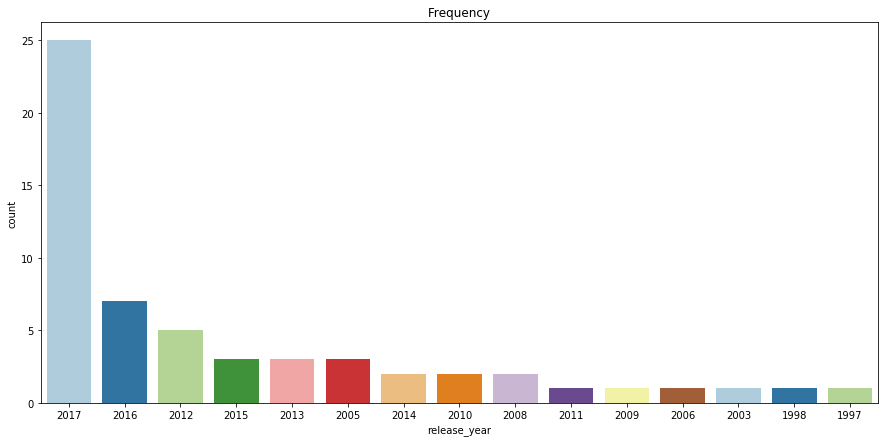

In [42]:
plt.figure(1, figsize=(15, 7))
plt.title("Frequency")
plt.
sns.countplot(x = "release_year", order=df['release_year'].value_counts().index[0:15] ,data=df,palette=sns.color_palette("Paired", 15))

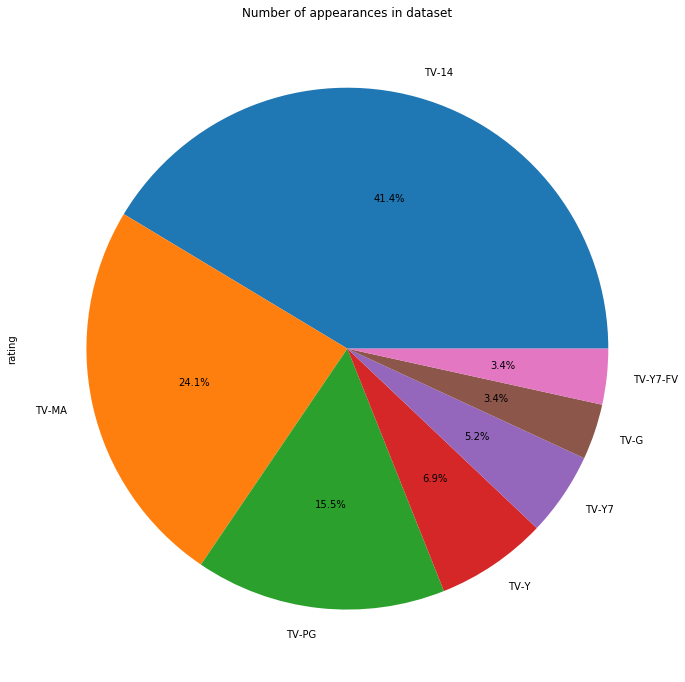

In [27]:
plt.figure(figsize=(12,12))
df.rating.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Number of appearances in dataset')
plt.show()

Text(0.5, 1.0, 'User scores by Rating')

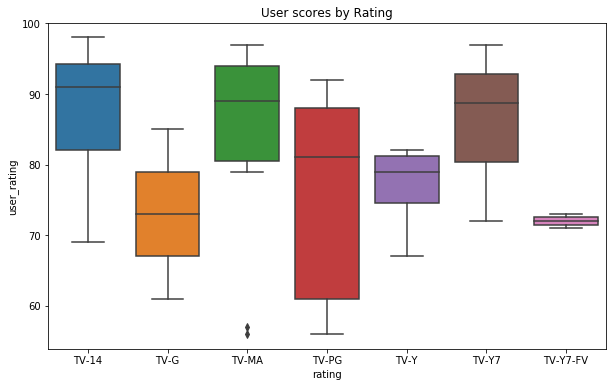

In [35]:
order = np.sort(df['rating'].unique())
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='user_rating', x='rating',order=order)
plt.title('User scores by Rating')

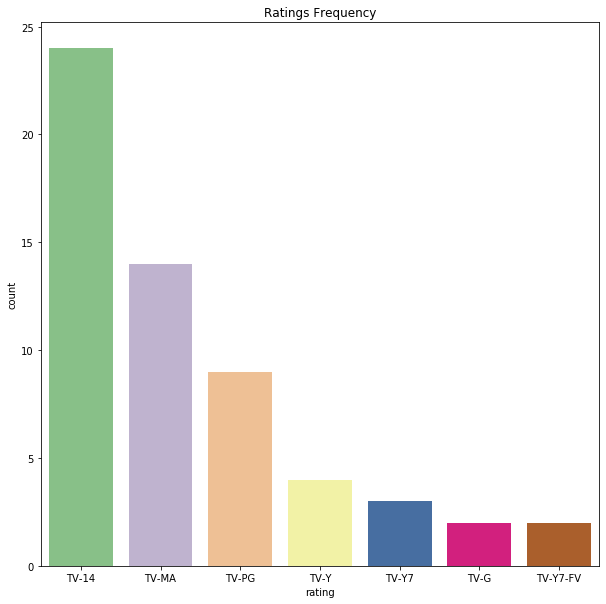

In [44]:
plt.figure(figsize=(10,10))
plt.title("Ratings Frequency")
sns.countplot(x='rating',data=df,order=df['rating'].value_counts().index,palette='Accent')
plt.show()